# 목차
---

## 1. 결측, 중복 처리
### 1.1 중복값 처리
### 1.2 결측값 처리
## 2. 이상치 처리
## 3. 상관 관계
### 3.1 운행 시간과 팁의 상관 관계
### 3.2 결제 수단과 팁의 상관 관계
### 3.3 상관 관계표
## 4. 회고

In [1]:
import pandas as pd   
import numpy as np
data = pd.read_csv('/aiffel/data/trip.csv')
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


## 1. 결측, 중복 처리
---

### 1.1 중복값 처리

In [2]:
# 중복행 확인
data[data.duplicated()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


In [3]:
#중복값 제거
data = data.drop_duplicates()

### 1.2 결측값 처리

In [4]:
#전체 결측값 확인
data.isna().all()

passenger_name           False
tpep_pickup_datetime     False
tpep_dropoff_datetime    False
payment_method           False
passenger_count          False
trip_distance            False
fare_amount              False
tip_amount               False
tolls_amount             False
dtype: bool

In [5]:
#열 별 결측값 확인
data.isna().any()

passenger_name           False
tpep_pickup_datetime     False
tpep_dropoff_datetime    False
payment_method           False
passenger_count          False
trip_distance            False
fare_amount               True
tip_amount               False
tolls_amount             False
dtype: bool

In [6]:
#결측값 수 확인
data['fare_amount'].isna().sum()

3

In [7]:
#결측 행 확인
fare_amount_na = data[data['fare_amount'].isna()].index

In [8]:
data.loc[fare_amount_na]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,Tina Avila,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


In [9]:
#결측치 비율 확인
print('결측값의 비율은 {:.2f}% 입니다.'.format(data['fare_amount'].isna().sum() / len(data) * 100))

결측값의 비율은 0.01% 입니다.


누락 값이 전체의 0.01%로 적은 수치로 drop해도 괜찮지만 <br/>
택시 비용은 거리에 영향을 받을 것으로 예상되어 tip_amount를 활용하여 결측치 보완해보겠습니다.

In [10]:
#trip_distance 2.20일 fare_amount 탐색
data[data['trip_distance'] == 2.20].describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,188.000000,1.880000e+02,187.000000,188.000000,188.0
mean,1.372340,2.200000e+00,11.256684,1.415798,0.0
std,1.013112,4.452750e-16,2.198092,1.297429,0.0
min,0.000000,2.200000e+00,8.000000,0.000000,0.0
25%,1.000000,2.200000e+00,10.000000,0.000000,0.0
50%,1.000000,2.200000e+00,10.500000,1.465000,0.0
75%,1.000000,2.200000e+00,12.250000,2.450000,0.0
max,6.000000,2.200000e+00,27.000000,5.600000,0.0


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trip_distance', ylabel='Density'>

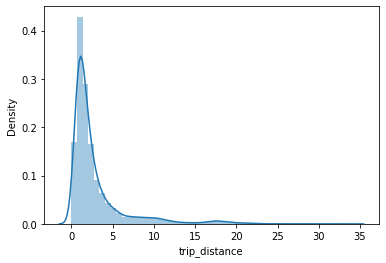

In [12]:
sns.distplot(data['trip_distance'])

In [13]:
mask = (data['trip_distance'] == 2.20) & (data['fare_amount'].isna())

data.loc[mask, 'fare_amount'] = data.loc[mask, 'fare_amount'].fillna(11)

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


min: 8, mean:11 이지만 max:27로 이상치 확인 <br/> 
교통체증, 야간 등 변수로 인해 이상치 제거는 보류 <br/> 
mean과 median 모두 11로 값 11 보완

In [14]:
# trip_distance 15.20일 때 탐색
data[data['trip_distance'] == 15.20].describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,5.000000,5.0,4.000000,5.000000,5.000000
mean,1.400000,15.2,45.000000,4.730000,2.216000
std,0.894427,0.0,4.690416,4.689296,3.034383
min,1.000000,15.2,42.000000,0.000000,0.000000
25%,1.000000,15.2,42.750000,0.000000,0.000000
50%,1.000000,15.2,43.000000,5.000000,0.000000
75%,1.000000,15.2,45.250000,8.650000,5.540000
max,3.000000,15.2,52.000000,10.000000,5.540000


값이 42~ 52로 균등, 평균값인 45로 보완

In [15]:
mask = (data['trip_distance'] == 15.20) & (data['fare_amount'].isna())

data.loc[mask, 'fare_amount'] = data.loc[mask, 'fare_amount'].fillna(45)

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [16]:
#15.89 일 때 탐색
data[data['trip_distance'] == 15.89].describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,1.0,1.00,0.0,1.0,1.00
mean,1.0,15.89,NaN,10.0,5.76
std,NaN,NaN,NaN,NaN,NaN
min,1.0,15.89,NaN,10.0,5.76
25%,1.0,15.89,NaN,10.0,5.76
50%,1.0,15.89,NaN,10.0,5.76
75%,1.0,15.89,NaN,10.0,5.76
max,1.0,15.89,NaN,10.0,5.76


trip_distance 15.89 동일값이 없어 근사치 탐색 시도

In [17]:
data[data['trip_distance'] == 15.90].describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,2.0,2.0,2.000000,2.000000,2.000000
mean,1.0,15.9,49.250000,4.500000,2.770000
std,0.0,0.0,3.889087,6.363961,3.917372
min,1.0,15.9,46.500000,0.000000,0.000000
25%,1.0,15.9,47.875000,2.250000,1.385000
50%,1.0,15.9,49.250000,4.500000,2.770000
75%,1.0,15.9,50.625000,6.750000,4.155000
max,1.0,15.9,52.000000,9.000000,5.540000


trip_distance 근사값 15.90의 mean 값인 49로 보완 결정

In [18]:
mask = (data['trip_distance'] == 15.89) & (data['fare_amount'].isna())

data.loc[mask, 'fare_amount'] = data.loc[mask, 'fare_amount'].fillna(49)

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [19]:
# 결측값 보완 확인
fare_amount_na = data[data['fare_amount'].isna()].index

In [20]:
data.loc[fare_amount_na]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount


## 2. 이상치 처리

In [21]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,1.643641,2.913313,13.026585,1.835781,0.312542
std,1.304986,3.653171,13.243537,2.800626,1.399212
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


passenger_count : 택시에 승객이 0명이거나 36명이 탈 수 없어 이상치 확인 <br/>
fare_amount : max trip_distance가 33.96 이지만 요금이 999로 과하게 높으며, min에 음수가 확인<br/>
tip_amount : tip 가격이 max 200으로 평균 fare_amount보다 높아 탐색 필요해 보입니다.

<AxesSubplot:ylabel='passenger_count'>

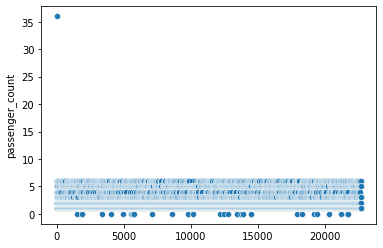

In [22]:
# passenger_count 탐색
sns.scatterplot( x=data.index, y = data['passenger_count'])

36 1개 값만 이상치로 확인

In [23]:
# passenger_count 이상치 제거
data = data[(data['passenger_count'] != 36) & (data['passenger_count'] > 0)]

<AxesSubplot:ylabel='fare_amount'>

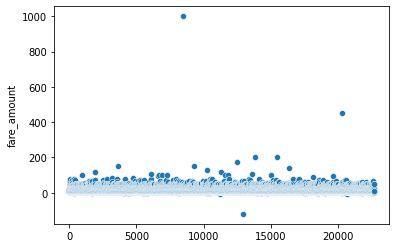

In [24]:
# fare_amount 이상치 탐색
sns.scatterplot( x=data.index, y = data['fare_amount'])

400 이상인 값 2개, 음수 1개로 총 3개 이상값 확인

In [25]:
# fare_amount 이상치 제거
data = data[(0 < data['fare_amount']) & (data['fare_amount'] < 400)]

In [26]:
# tip_amount 이상치 확인
data['tip_amount'].describe()

count    22643.000000
mean         1.828376
std          2.473869
min          0.000000
25%          0.000000
50%          1.350000
75%          2.450000
max         55.500000
Name: tip_amount, dtype: float64

tip_amount 200인 값은 위 이상치값들에서 함께 제거되어 이상치 제거 완료

## 3. 상관 관계

### 3.1 운행 시간과 팁의 상관 관계

택시 운행시간이 길어질수록 팁을 받을 확률이 높지 않을까?

In [27]:
#drop off time 에서 pick up time을 뺀 시간을 분 단위로 변환

data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])
data['time_diff'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 60
data['time_diff'] = data['time_diff'].round()

In [28]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,time_diff
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Debit Card,6,3.34,13.0,2.76,0.0,14.0
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Debit Card,1,1.80,16.0,4.00,0.0,26.0
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Debit Card,1,1.00,6.5,1.45,0.0,7.0
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,30.0
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Debit Card,1,4.37,16.5,0.00,0.0,17.0


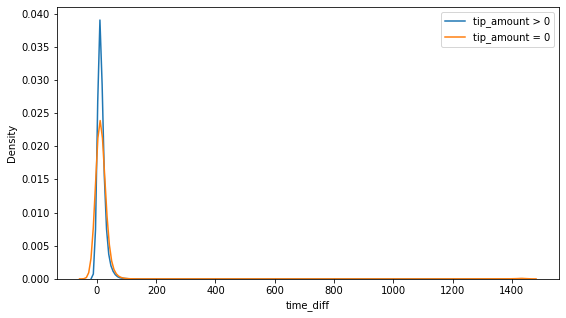

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(data[data['tip_amount'] > 0]['time_diff'], ax=ax)
sns.kdeplot(data[data['tip_amount'] == 0]['time_diff'], ax=ax)
plt.legend(['tip_amount > 0', 'tip_amount = 0'])
plt.show()

시간 차이가 1400분이 넘는 이상치로 예상되는 값이 확인되어 탐색해보겠습니다.

In [30]:
# time_diff 이상치 탐색
data.sort_values(by='time_diff', ascending= False)

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,time_diff
926,Michael Perez,2017-02-09 23:24:58,2017-02-10 23:24:31,Cash,5,4.86,17.5,0.00,0.0,1440.0
22640,Margaret Conner,2017-04-03 21:02:49,2017-04-04 21:01:28,Credit Card,1,1.73,9.0,0.00,0.0,1439.0
15000,Jennifer Wilson,2017-07-31 14:04:25,2017-08-01 14:03:16,Cash,5,0.95,8.0,1.76,0.0,1439.0
15581,Ashley Holmes,2017-05-10 18:53:53,2017-05-11 18:53:02,Cash,5,0.74,7.0,0.00,0.0,1439.0
15165,Katelyn Greer,2017-04-13 23:41:09,2017-04-14 23:39:42,Cash,2,1.99,7.0,0.00,0.0,1439.0
...,...,...,...,...,...,...,...,...,...,...
17313,Nicole Mitchell,2017-03-07 18:16:47,2017-03-07 18:16:47,Credit Card,1,0.00,2.5,0.00,0.0,0.0
6880,Daniel Martinez,2017-08-17 04:06:26,2017-08-17 04:06:29,Debit Card,4,0.00,98.5,0.00,0.0,0.0
9157,Ryan Adams,2017-12-01 18:41:19,2017-12-01 18:41:19,Cash,4,0.00,2.5,0.00,0.0,0.0
17106,Christina Tucker,2017-10-05 22:41:07,2017-10-05 22:41:10,Cash,1,0.80,4.5,1.15,0.0,0.0


In [31]:
data[data['time_diff'] > 500]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,time_diff
699,Scott Garcia,2017-06-10 21:55:01,2017-06-11 21:45:51,Debit Card,1,1.36,8.5,1.47,0.00,1431.0
926,Michael Perez,2017-02-09 23:24:58,2017-02-10 23:24:31,Cash,5,4.86,17.5,0.00,0.00,1440.0
1012,James Anderson,2017-12-08 07:17:20,2017-12-09 07:07:22,Cash,1,0.33,4.5,0.00,0.00,1430.0
1201,Carla Allen,2017-11-12 19:52:44,2017-11-13 19:37:35,Credit Card,1,4.14,18.0,3.76,0.00,1425.0
1357,Jamie Collins,2017-04-17 21:26:49,2017-04-18 20:46:13,Cash,6,4.09,15.0,0.00,0.00,1399.0
1760,Ronald Kidd,2017-12-28 23:58:24,2017-12-29 23:38:45,Cash,1,1.23,7.0,1.66,0.00,1420.0
4602,Brandon Miller,2017-12-20 08:24:34,2017-12-21 07:39:27,Cash,4,1.26,10.0,0.00,0.00,1395.0
5372,Catherine Ray,2017-12-13 19:40:05,2017-12-14 19:31:09,Cash,3,0.93,12.0,2.07,0.00,1431.0
5480,Patricia Galvan,2017-09-19 13:16:13,2017-09-20 12:36:12,Credit Card,1,0.62,5.5,0.00,0.00,1400.0
6495,Travis Tucker,2017-06-27 16:52:07,2017-06-28 16:49:57,Cash,1,15.60,52.0,0.00,0.00,1438.0


trip_distance와 fare_amount를 고려하였을 때 비정상적인 time_diff로 확인되어 이상치 제거하겠습니다.

In [32]:
data = data[data['time_diff'] < 500]

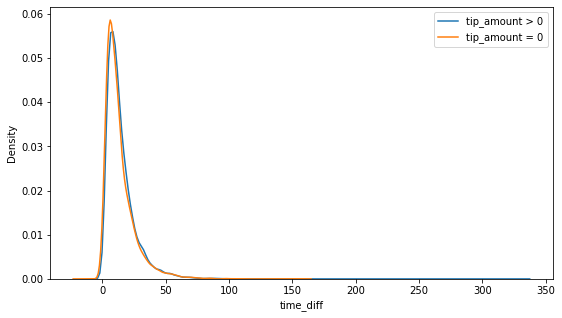

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(data[data['tip_amount'] > 0]['time_diff'], ax=ax)
sns.kdeplot(data[data['tip_amount'] == 0]['time_diff'], ax=ax)
plt.legend(['tip_amount > 0', 'tip_amount = 0'])

plt.show()

팁을 받을 때와 받지 않을 때의 그래프가 거의 동일한 모양을 보입니다.

### 결론 : 택시를 오래타더라도 팁을 주는 것과는 큰 상관 관계가 없는 것 같습니다.

### 3.2 결제 수단과 팁의 상관 관계

현금일 때 팁을 더 자주 많이 받지 않을까?

In [34]:
# payment_method의 카드 정보에서 card만 추출
data['payment_method'].str.split(expand = True)

,0,1
0,Debit,Card
1,Debit,Card
2,Debit,Card
3,Cash,None
4,Debit,Card
...,...,...
22696,Cash,None
22697,Cash,None
22698,Debit,Card
22699,Debit,Card


In [35]:
# 분리한 card 값만 대입
data['payment_method'] = data['payment_method'].str.split().apply(lambda x: x[-1])

In [36]:
data.groupby('payment_method').size()

payment_method
Card    11452
Cash    11148
dtype: int64

In [37]:
# 카드는 0, 현금은 1로 변환
data['payment_method'] = data['payment_method'].map({'Card': 0, 'Cash': 1})

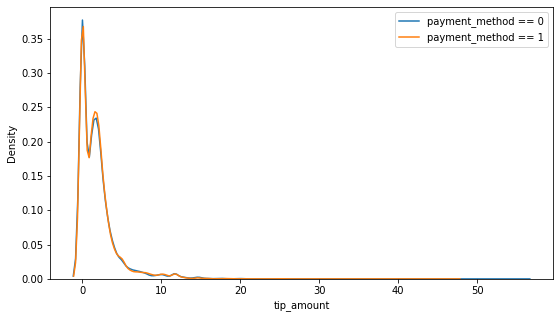

In [38]:
fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.kdeplot(data[(data['payment_method'] == 0)]['tip_amount'], ax=ax)
sns.kdeplot(data[(data['payment_method'] == 1)]['tip_amount'], ax=ax)
plt.legend(['payment_method == 0', 'payment_method == 1'])
plt.show()

파란색이 카드, 주황색이 현금 <br/>
그래프로 보았을 때는 금액과 빈도 모두 비슷한 것으로 보여집니다.

### 결론 : 결제 수단과 팁은 큰 상관 관계가 없는 것 같습니다.

### 3.3 상관 관계 표

<AxesSubplot:title={'center':'Correalation of Features'}>

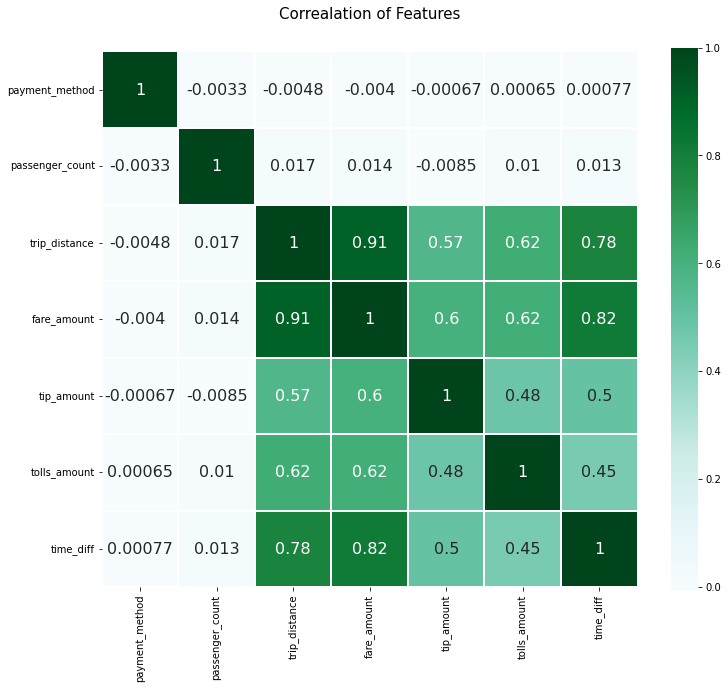

In [39]:
colormap = plt.cm.BuGn
plt.figure(figsize=(12,10))
plt.title('Correalation of Features', y=1.05, size = 15)
sns.heatmap(data.corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='White', annot=True, annot_kws={'size': 16})

Top3 <br/> 
1. fare_amount <-> trip_distance (0.91)
2. fare_amount <-> time_diff (0.82) 
3. time_diff <-> trip_distance (0.78)

# 4. 회고

데이터를 여러 방향으로 생각하며 만들어보는 과정에서 생각하지 못했던 문제가 발생했지만 <br/>
복잡하지 않은 데이터 구조라서 어렵지 않게 차근차근 해결해 나갈 수 있었습니다.<br/>
상관관계에서 생각했던 방향과 다르게 데이터가 보여져 무언가를 결정할 때는 추측성보다는 이러한 데이터 기반으로 의사 결정을 하는 것이 중요하다는 것을 다시한번 느끼게 되었습니다.